In [1]:
##import graphlab
import pandas as pd
import numpy as np
import sys
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [2]:
temp=pd.read_csv(r"/Users/wagao/Desktop/Independent Study/Tianlai-project/tianlai-master/writeNewDataLog20180315.csv",sep='\t',encoding="utf-8",engine='python',)

In [3]:
temp.columns

Index([u'user_id_x', u'individual_x', u'team_x', u'gender_x',
       u'constellation_x', u'user_charact_x', u'region_x', u'rank_x',
       u'user_age_x', u'user_work_id', u'activity', u'score', u'activitytime',
       u'user_work_type', u'user_work_mod', u'user_work_scene', u'user_id_y',
       u'song_id', u'time', u'individual_y', u'team_y', u'gender_y',
       u'constellation_y', u'user_charact_y', u'region_y', u'rank_y',
       u'user_age_y', u'song_theme', u'song_entert', u'song_age', u'song_lang',
       u'song_genre', u'song_location', u'song_key', u'song_opera',
       u'song_trend', u'song_title', u'song_spec', u'song_type',
       u'song_video_rank', u'singer_id', u'song_video', u'song_audio',
       u'singer_m', u'singer_f', u'singer_g', u'singer_sex', u'singer_name',
       u'singer_age_range', u'singer_location'],
      dtype='object')

In [4]:
from collections import Counter

Counter(temp.time)


Counter({u'2014-06-30': 2,
         u'2016-05-18': 41,
         u'2015-12-07': 5,
         u'2015-11-19': 13,
         u'2015-11-18': 12,
         u'2015-12-05': 6,
         u'2015-11-11': 16,
         u'2015-11-10': 20,
         u'2015-11-13': 31,
         u'2015-11-12': 11,
         u'2015-11-15': 38,
         u'2015-11-14': 36,
         u'2015-11-17': 15,
         u'2015-11-16': 3,
         u'2016-05-17': 18,
         u'2017-04-30': 187,
         u'2015-11-02': 52,
         u'2013-04-19': 5,
         u'2015-12-14': 2,
         u'2015-12-15': 8,
         u'2015-12-16': 21,
         u'2015-12-17': 14,
         u'2013-07-10': 8,
         u'2015-12-12': 37,
         u'2015-12-13': 41,
         u'2015-12-18': 13,
         u'2015-12-19': 12,
         u'2017-07-02': 278,
         u'2014-03-31': 12,
         u'2016-08-30': 46,
         u'2016-08-31': 80,
         u'2017-02-21': 159,
         u'2014-01-03': 2,
         u'2013-03-12': 2,
         u'2013-04-12': 5,
         u'2013-03-15': 1,
 

In [5]:
temp.loc[temp.activity==u'送礼物','score']=12
temp.loc[temp.activity==u'评论','score']=10
temp.loc[temp.activity==u'播放','score']=2
temp.loc[temp.activity==u'下载','score']=6

temp1=temp.groupby(['user_id_x','user_work_id','constellation_x','gender_x','region_x','user_age_x','user_age_y','region_y','gender_y','constellation_y','song_lang','song_genre','singer_m','singer_f','singer_g','singer_sex'],as_index=False)['score'].sum()
temp1.columns

Index([u'user_id_x', u'user_work_id', u'constellation_x', u'gender_x',
       u'region_x', u'user_age_x', u'user_age_y', u'region_y', u'gender_y',
       u'constellation_y', u'song_lang', u'song_genre', u'singer_m',
       u'singer_f', u'singer_g', u'singer_sex', u'score'],
      dtype='object')

In [6]:
from collections import Counter
Counter(temp1.score)


Counter({6.0: 1147,
         10.0: 4826,
         12.0: 817,
         18.0: 327,
         20.0: 3455,
         24.0: 153,
         30.0: 2696,
         36.0: 57,
         40.0: 1976,
         42.0: 37,
         48.0: 41,
         50.0: 1580,
         54.0: 18,
         60.0: 1203,
         66.0: 22,
         70.0: 980,
         72.0: 13,
         78.0: 11,
         80.0: 775,
         84.0: 5,
         90.0: 625,
         96.0: 3,
         100.0: 508,
         102.0: 3,
         108.0: 5,
         110.0: 442,
         114.0: 2,
         120.0: 377,
         126.0: 1,
         130.0: 267,
         132.0: 2,
         140.0: 267,
         150.0: 188,
         160.0: 160,
         168.0: 1,
         170.0: 152,
         174.0: 1,
         180.0: 133,
         190.0: 97,
         192.0: 1,
         198.0: 1,
         200.0: 80,
         204.0: 1,
         210.0: 62,
         220.0: 51,
         230.0: 49,
         234.0: 1,
         240.0: 42,
         250.0: 42,
         260.0: 31,
       

In [6]:
y=temp1[['score']]
X=temp1[['gender_x','constellation_x','region_x','user_age_x','user_age_y','region_y','gender_y','constellation_y','song_lang','song_genre','singer_m','singer_f','singer_g','singer_sex']]
 

X['gender_x'] = X['gender_x'].astype('category')
X['constellation_x'] = X['constellation_x'].astype('category')
X['region_x'] = X['region_x'].astype('category')
X['user_age_x'] = X['user_age_x'].astype('category')
X['gender_y'] = X['gender_y'].astype('category')
X['constellation_y'] = X['constellation_y'].astype('category')
X['region_y'] = X['region_y'].astype('category')
X['user_age_y'] = X['user_age_y'].astype('category')
X['song_lang'] = X['song_lang'].astype('category')
X['song_genre'] = X['song_genre'].astype('category')
X['singer_m'] = X['singer_m'].astype('category')
X['singer_f'] = X['singer_f'].astype('category')
X['singer_g'] = X['singer_g'].astype('category')
X['singer_sex'] = X['singer_sex'].astype('category')

cat_columns = X.select_dtypes(['category']).columns
X[cat_columns] = X[cat_columns].apply(lambda x: x.cat.codes)

X['gender_x'] = X['gender_x'].astype(str)
X['constellation_x'] = X['constellation_x'].astype(str)
X['region_x'] = X['region_x'].astype(str)
X['user_age_x'] = X['user_age_x'].astype(str)
X['gender_y'] = X['gender_y'].astype(str)
X['constellation_y'] = X['constellation_y'].astype(str)
X['region_y'] = X['region_y'].astype(str)
X['user_age_y'] = X['user_age_y'].astype(str)
X['song_lang'] = X['song_lang'].astype(str)
X['song_genre'] = X['song_genre'].astype(str)
X['singer_m'] = X['singer_m'].astype(str)
X['singer_f'] = X['singer_f'].astype(str)
X['singer_g'] = X['singer_g'].astype(str)
X['singer_sex'] = X['singer_sex'].astype(str)


offset=int(temp1.shape[0]*0.8)

X_train, y_train = X[:offset], y[:offset]
X_test, y_test = X[offset:], y[offset:]

y_test.sort_values(by='score', ascending=False, na_position='first')


/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


score
19280  690.0
22838  560.0
19632  400.0
20915  390.0
22956  380.0
20076  370.0
20276  360.0
22407  350.0
21522  350.0
19959  350.0
22413  340.0
19404  340.0
20223  330.0
20078  310.0
20945  310.0
21617  300.0
20946  300.0
21297  300.0
22503  290.0
20844  280.0
23402  280.0
19818  270.0
23755  270.0
22037  270.0
20990  260.0
19560  260.0
21625  260.0
20552  260.0
22313  260.0
19394  260.0
...      ...
20891    6.0
21517    6.0
23529    6.0
23528    6.0
21516    6.0
23526    6.0
21515    6.0
20302    6.0
21514    6.0
19692    6.0
21513    6.0
20301    6.0
19697    6.0
20885    6.0
19698    6.0
20264    6.0
20271    6.0
20270    6.0
20269    6.0
23497    6.0
20266    6.0
20952    6.0
19728    6.0
20265    6.0
23181    6.0
23491    6.0
19730    6.0
20964    6.0
19732    6.0
22603    6.0

[4779 rows x 1 columns]

In [7]:
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import math

params = {'n_estimators': 1000, 'max_depth': 100, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'huber','min_samples_leaf': 50, 'max_features': 'sqrt','subsample': 0.8}
clf1 = ensemble.GradientBoostingRegressor(**params)

clf1.fit(X_train, y_train)
#fpr, tpr, thresholds = metrics.roc_curve(y_test, clf.predict(X_test), pos_label=2)
#metrics.auc(fpr, tpr)
mse = mean_squared_error(y_test, clf1.predict(X_test))
#mse2 = mean_squared_error(y_train, clf1.predict(X_train))
mse=math.sqrt( mse )

print("MSE: %.4f" % mse)
#print("MSE2: %.4f" % mse2)


 

/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE: 49.8881


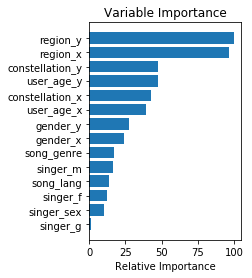

In [13]:
import matplotlib.pyplot as plt

feature_importance = clf1.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import math

params = {'n_estimators': 1000, 'max_depth': 1000,'random_state': 2, 'random_state': 2 }
clf2 =RandomForestRegressor(**params)

clf2.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf2.predict(X_test))
mse=math.sqrt( mse )

print("MSE: %.4f" % mse)

/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


MSE: 51.4712


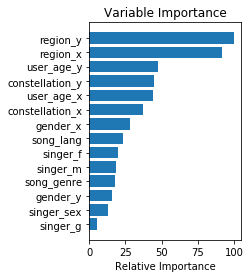

In [13]:
import matplotlib.pyplot as plt

feature_importance = clf2.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [9]:
from sklearn import svm
from sklearn.datasets import make_regression
from sklearn import ensemble
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import math
   
params = {'C': 2.0, 'cache_size': 300,'coef0': 0.0, 'degree': 5 ,'epsilon': 0.9, 'gamma': 'auto','kernel': 'rbf', 'max_iter': -1,'shrinking': True,'tol': 0.01,'verbose': False}
clf3 =svm.SVR(**params)

clf3.fit(X_train, y_train)
mse = mean_squared_error(y_test, clf3.predict(X_test))
mse=math.sqrt( mse )

print("MSE: %.4f" % mse)

MSE: 51.6875


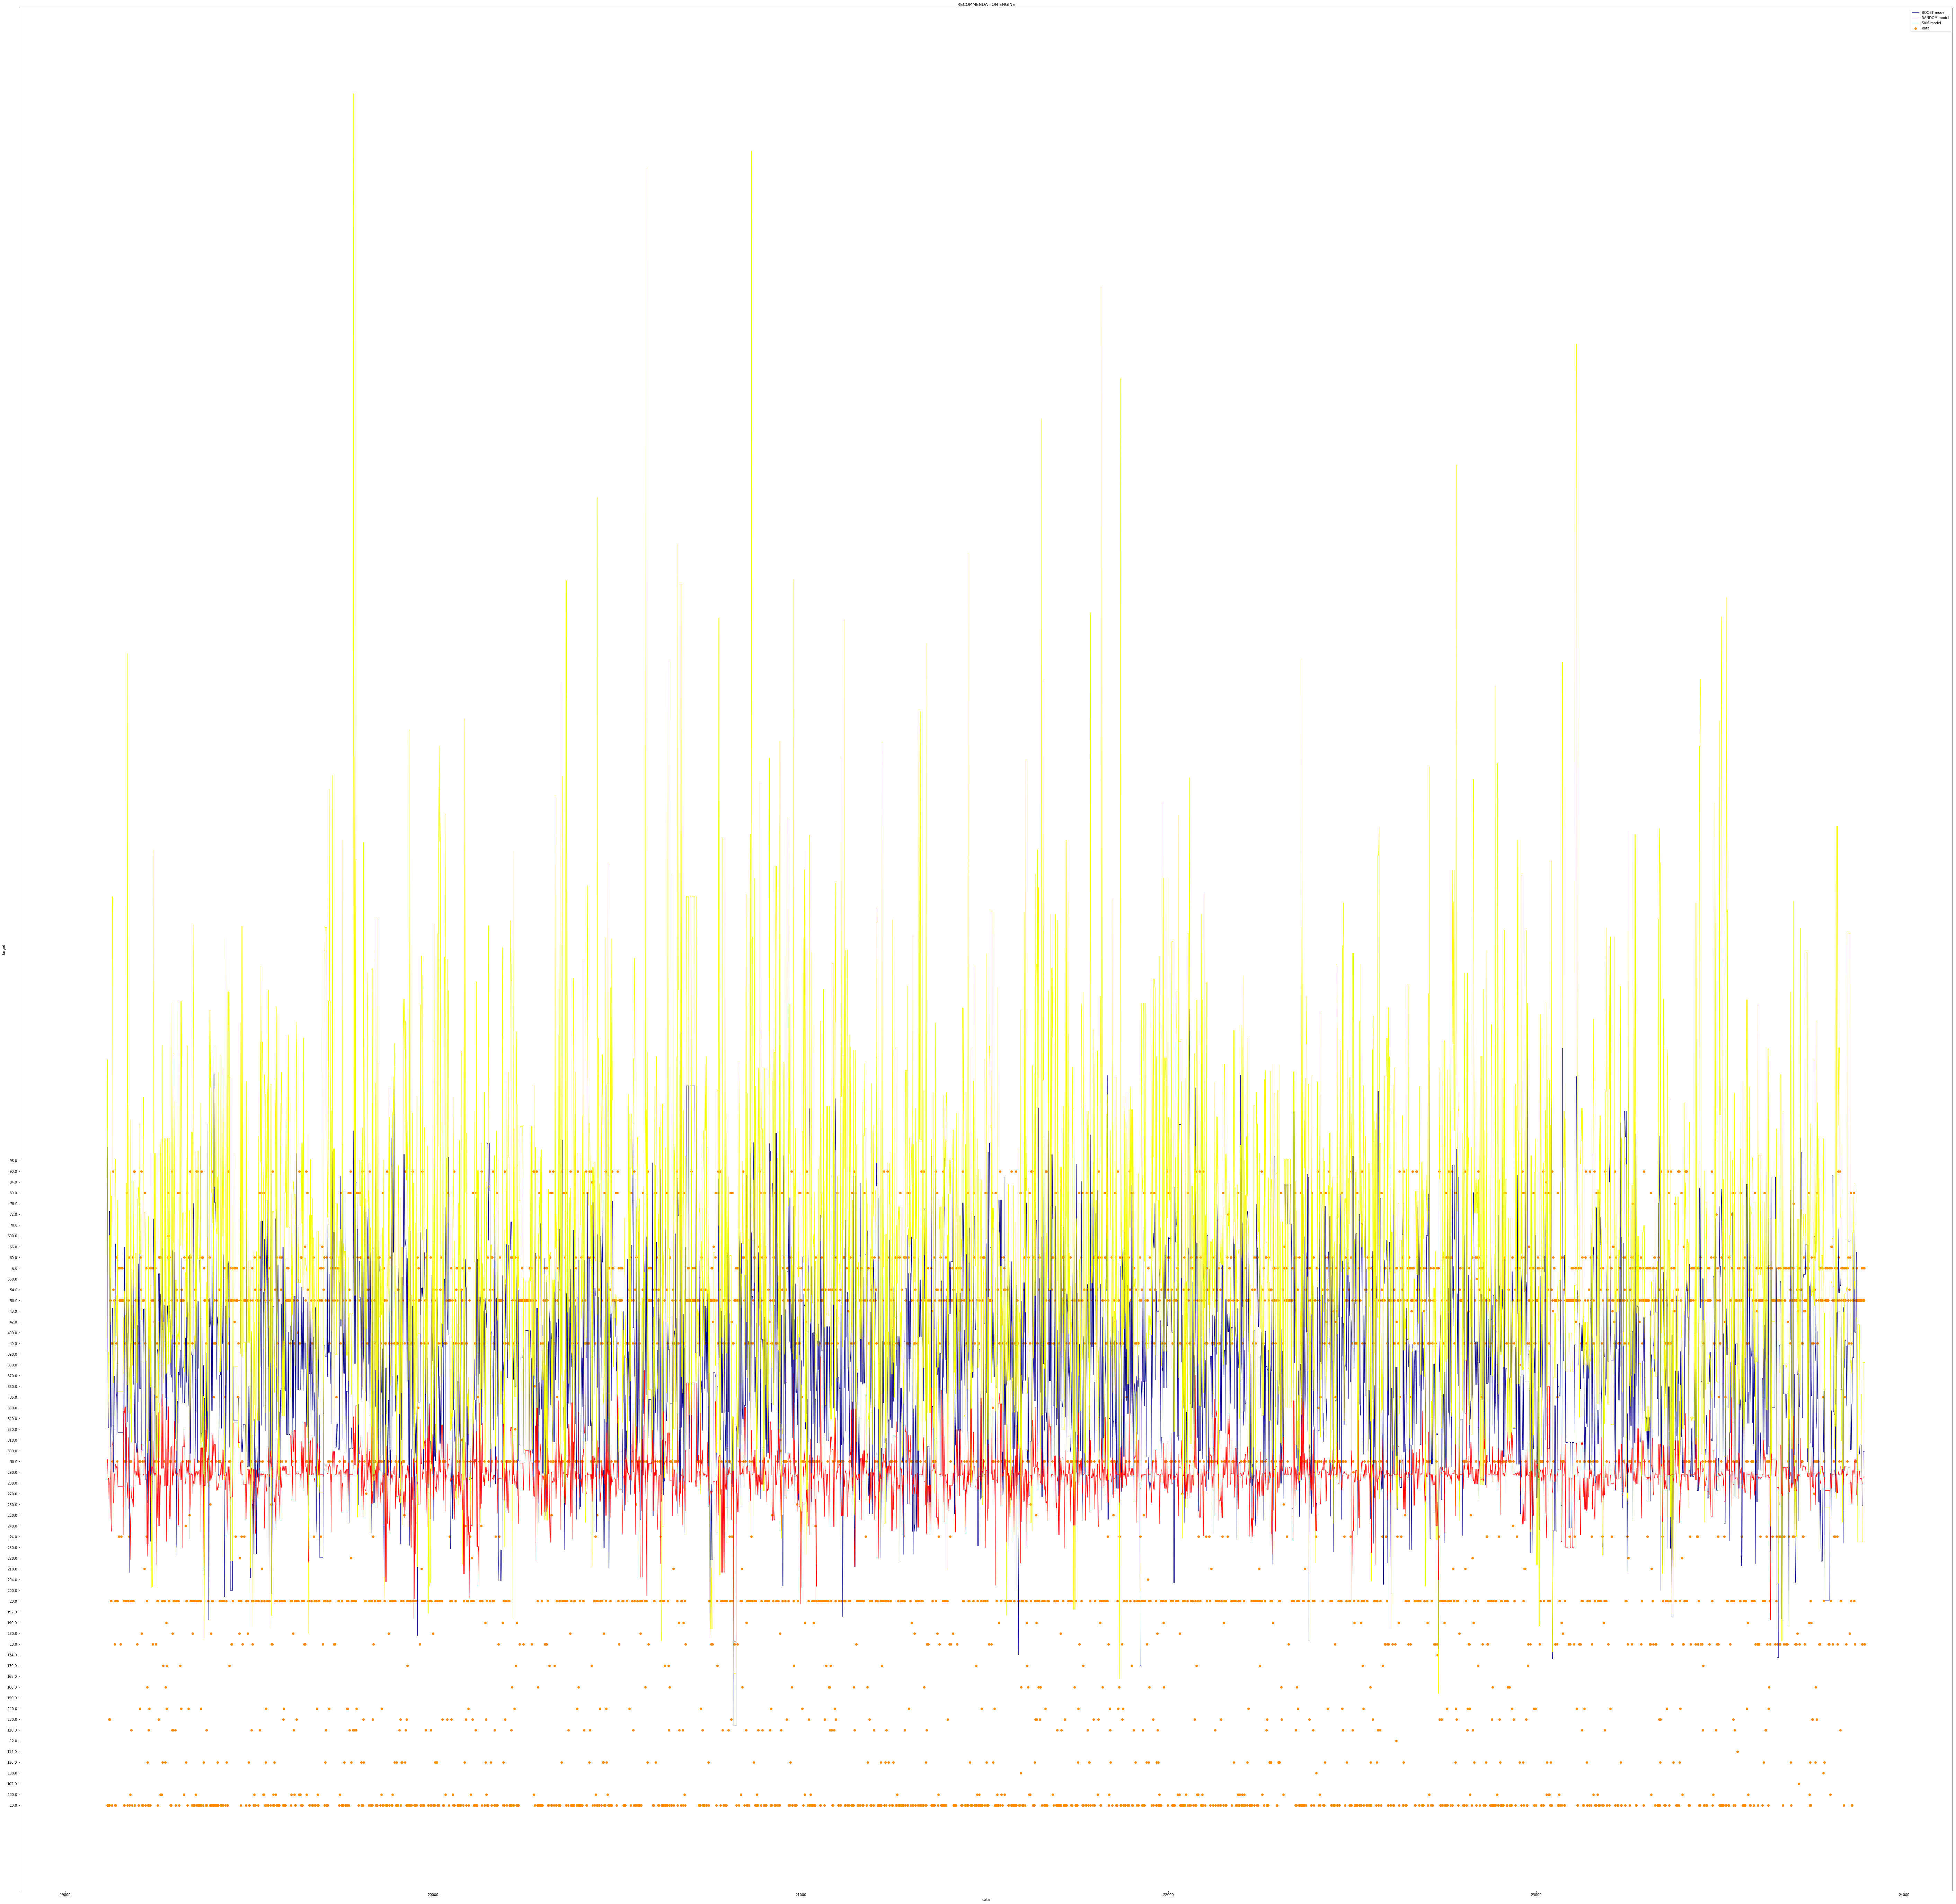

In [15]:
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 100, 100

lw = 1
plt.scatter(X_test.index, y_test, color='darkorange', label='data')
#plt.plot(X_test.iloc[:,0], clf1.predict(X_test), color='navy', lw=lw, label='BOOST model')
plt.plot(X_test.index, clf1.predict(X_test), color='navy', lw=lw, label='BOOST model')
plt.plot(X_test.index, clf2.predict(X_test), color='yellow', lw=lw, label='RANDOM model')
plt.plot(X_test.index, clf3.predict(X_test), color='red', lw=lw, label='SVM model')
plt.xlabel('data')
plt.ylabel('target')
plt.title('RECOMMENDATION ENGINE')
plt.legend()
plt.show()